In [1]:
##Import Statements, Functions, and Cleaning of Data
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["font.size"] = 14
edu = pd.read_csv("Education1.csv")
edu_columns = ['FIPS Code', 'State',
       "Percent of adults with less than a high school diploma, 2014-18",
       "Percent of adults with a high school diploma only, 2014-18",
       "Percent of adults completing some college or associate's degree, 2014-18",
       "Percent of adults with a bachelor's degree or higher, 2014-18"]

edu = edu[edu_columns]

election = pd.read_csv("US_County_Level_Presidential_Results_12-16.csv")

unemployment = pd.read_csv("Unemployment2.csv")
unemployment_columns = ['FIPS', 'State','Median_Household_Income_2018']
unemployment = unemployment[unemployment_columns]

def string_float(string):
    return float(string.replace("$","").replace(",",""))
def percent_decimal(percent):
    return percent/100

df = pd.merge(left = edu, right = unemployment, on = "State")
df = pd.merge(left = df, right = election).dropna()
df = df.rename(columns = {"Percent of adults with less than a high school diploma, 2014-18": "percent_less_hs_diploma", 
                          "Percent of adults with a high school diploma only, 2014-18": "percent_hs_diploma", 
                          "Percent of adults completing some college or associate's degree, 2014-18": "percent_associates_degree", 
                          "Percent of adults with a bachelor's degree or higher, 2014-18":"percent_bachelors_higher"})
df["percent_less_hs_diploma"] = df["percent_less_hs_diploma"].apply(percent_decimal)
df["percent_hs_diploma"] = df["percent_hs_diploma"].apply(percent_decimal)
df["percent_associates_degree"] = df["percent_associates_degree"].apply(percent_decimal)
df["percent_bachelors_higher"] = df["percent_bachelors_higher"].apply(percent_decimal)
df["Median_Household_Income_2018"] = df["Median_Household_Income_2018"].apply(string_float)
df = df[df["State"] == "IL"]
train, test = train_test_split(df, random_state = None)

Text(0.5, 1.0, 'Figure 1')

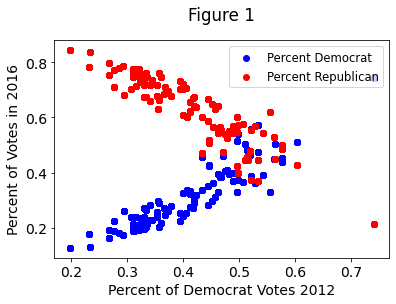

In [2]:
#Figure 1
plt.scatter(x = df["per_dem_2012"], y = df["per_dem_2016"], color = "blue")
plt.scatter(x = df["per_dem_2012"], y = df["per_gop_2016"], color = "red")
plt.legend(["Percent Democrat", "Percent Republican"], loc = "best", fontsize = "small")
plt.xlabel("Percent of Democrat Votes 2012")
plt.ylabel("Percent of Votes in 2016")
plt.title("Figure 1", pad = 20)


Text(0.5, 1.0, 'Figure 2: Principal Components 1 and 2 (Median Household Income)')

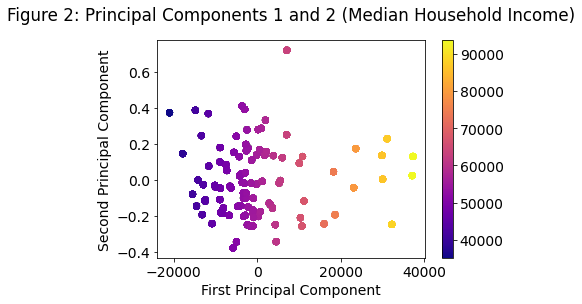

In [3]:
#Figure 2 (PCA)
pca_columns = ['percent_less_hs_diploma', 'percent_bachelors_higher','per_dem_2012', 'per_gop_2012',
               'per_dem_2016', 'per_gop_2016', 'Median_Household_Income_2018']

pca_df = train[pca_columns]
pca = PCA(2)
pca.fit(pca_df)
transform_pca = pd.DataFrame(pca.transform(pca_df))

plt.scatter(transform_pca[0], transform_pca[1], c = pca_df["Median_Household_Income_2018"], cmap = 'plasma')
plt.colorbar()
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Figure 2: Principal Components 1 and 2 (Median Household Income)", pad = 20)

Text(0.5, 0, 'Coefficent Values')

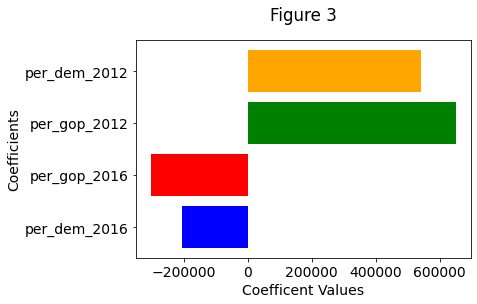

In [4]:
#Figure 3 Linear Regression

train_cols = ['per_dem_2016', 'per_gop_2016', 'per_gop_2012', 'per_dem_2012']
test_cols = train_cols
train_x = train[train_cols]
train_y = train["Median_Household_Income_2018"]
test_x = test[test_cols]
test_y = test["Median_Household_Income_2018"]
test = test.copy()

lr = LinearRegression()
lr.fit(train_x, train_y)
test["Predicted Median Household Income 2018"] = lr.predict(test_x)

value = lr.coef_
plt.barh(y = train_cols, width = value, color = ['blue', 'red', 'green', 'orange'])
plt.title("Figure 3", pad = 20)
plt.ylabel("Coefficients")
plt.xlabel("Coefficent Values")

In [5]:
lr.score(test_x, test_y)
cross_val_score(lr, train_x, train_y, cv = 8).mean()

0.4088609507442986